## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
mouse_study_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse= dup_mouse["Mouse ID"].drop_duplicates()
dup_mouse = pd.DataFrame(dup_mouse)
dup_mouse

,Mouse ID
909,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_info = pd.DataFrame(dup_mouse)
dup_mouse_info_df = dup_mouse_info.merge(mouse_study_df, on = "Mouse ID")
dup_mouse_info_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.copy()
clean_mouse_study_df = clean_mouse_study_df.loc[~(clean_mouse_study_df["Mouse ID"].isin(dup_mouse["Mouse ID"]))]
clean_mouse_study_df()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_study_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Calculate mean, median, std, variance, sem.

tumor_volume_stats = clean_mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Median Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Std. Dev. Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Variance Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()
tumor_df


,Mean Tumor Volume,Median Tumor Volume,Std. Dev. Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

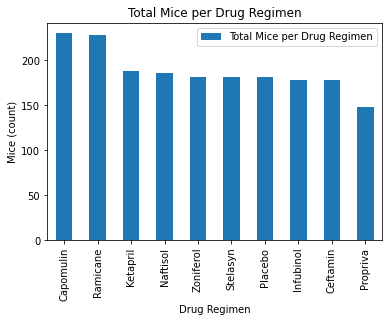

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
mouseplt = clean_mouse_study_df["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="Total Mice per Drug Regimen")
plt.legend()
plt.show()


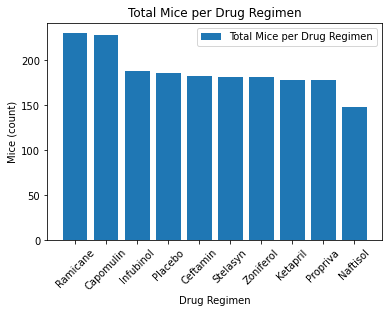

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
myplt = clean_mouse_study_df["Drug Regimen"].unique()
myplt
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
plt.bar(myplt, height=(mouseplt), label="Total Mice per Drug Regimen")
plt.xticks(rotation=45)
plt.legend()
plt.show()


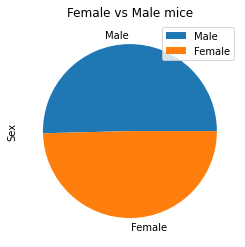

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_vs_male = clean_mouse_study_df.drop_duplicates(subset=["Mouse ID"])
female_vs_male = female_vs_male["Sex"].value_counts()
plt.title("Female vs Male mice")
female_vs_male.plot.pie()
plt.legend()
plt.show()


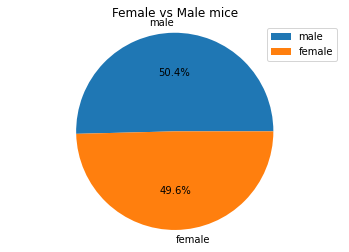

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'male','female'
sizes = female_vs_male

fig1, ax1 = plt.subplots()
plt.title("Female vs Male mice")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_data = clean_mouse_study_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(tumor_volume_data, clean_mouse_study_df, how='left', on=['Mouse ID','Timepoint'])
tumor_volume.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_lists = [ [] for _ in range(len(drug_regimen)) ]

#  for loop to add each final tumor volumes into corresponding treatment list
for index,row in tumor_volume.iterrows():
    if (row['Drug Regimen'] in drug_regimen):
        for i in range(len(drug_regimen)):
            # Locating the rows which contain mice on each drug and get the tumor volumes
            if (row['Drug Regimen'] == drug_regimen[i]):
                treatment_lists[i].append(row['Tumor Volume (mm3)'])
                break

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
 # Defining a function to Calculate and Display Quartiles and Outlier Bounds
def print_quartiles_outliers(treatment_list, drug_regimen):
    #Calculating Quartiles
    treatment = pd.Series(treatment_list)
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"\n------------ {drug_regimen} ------------")
    # Displaying Quartiles
    print(f"The lower quartile for final Tumor Volume is: {lowerq}")
    print(f"The upper quartile for final Tumor Volume is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median for final Tumor Volume is: {quartiles[0.5]}\n")

    # Calculating upper and lower bounds for Outlier detection
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Displaying Outlier bounds 
    print(f"Tumor Volume below {lower_bound} could be outliers.")
    print(f"Tumor Volume {upper_bound} could be outliers.")
      
    # Finding any Outliers using list comprehension
    outliers = [i for i in treatment_list if ((i > upper_bound) | (i < lower_bound))]
    print(f"\n\tNumber of Outliers: {len(outliers)}\n")
    
    # Calling quartiles and outliers function for each Treatment
for i in range(len(drug_regimen)):
    print_quartiles_outliers(treatment_lists[i], drug_regimen[i])
   


------------ Capomulin ------------
The lower quartile for final Tumor Volume is: 32.37735684
The upper quartile for final Tumor Volume is: 40.1592203
The interquartile range is: 7.781863460000004
The the median for final Tumor Volume is: 38.125164399999996

Tumor Volume below 20.70456164999999 could be outliers.
Tumor Volume 51.83201549 could be outliers.

	Number of Outliers: 0


------------ Ramicane ------------
The lower quartile for final Tumor Volume is: 31.56046955
The upper quartile for final Tumor Volume is: 40.65900627
The interquartile range is: 9.098536719999998
The the median for final Tumor Volume is: 36.56165229

Tumor Volume below 17.912664470000003 could be outliers.
Tumor Volume 54.30681135 could be outliers.

	Number of Outliers: 0


------------ Infubinol ------------
The lower quartile for final Tumor Volume is: 54.04860769
The upper quartile for final Tumor Volume is: 65.52574285
The interquartile range is: 11.477135160000003
The the median for final Tumor Volum

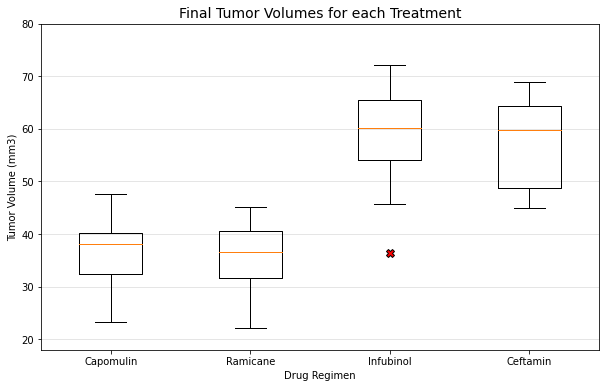

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Adding title, labels and ylim to the plot 
ax.set_title('Final Tumor Volumes for each Treatment', fontsize=14)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_ylim(18,80)

# Defining styles for the fliers(Outlier markings)
flierprops = dict(marker='X', markerfacecolor='r', markersize=8)

# Creating a box plot based upon the treatment_lists (a list of lists) and a list of drug regimen
ax.boxplot(treatment_lists,
           labels=drug_regimen, 
           flierprops=flierprops
          )

# Adding grid lines across y axis to the chart
ax.yaxis.grid(color="grey", alpha=0.25)

# Print our chart to the screen
plt.show()

## Line and Scatter Plots

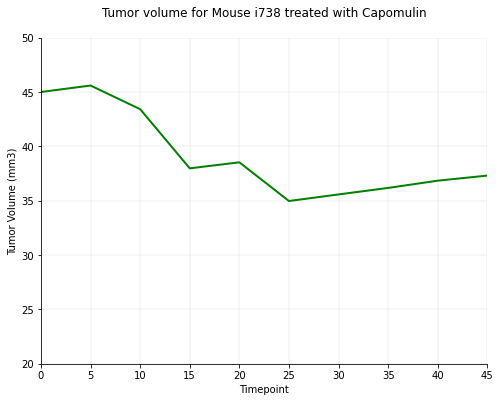

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mouse_ID = 'i738'

# Creating a Data Frame of Timepoint and Tumor Volume for a mouse treated with Capomulin
capomulin_time_volume = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_study_df['Mouse ID'] == Mouse_ID),
                                       ['Timepoint', 'Tumor Volume (mm3)']
                                      ].reset_index(drop=True) \
                                       .set_index('Timepoint')

# Creating a line plot from the Data Frame
ax = capomulin_time_volume.plot(figsize=(8, 6),
                                title="Tumor volume for Mouse " + Mouse_ID + " treated with Capomulin\n",
                                linewidth=2,
                                color='green',
                                legend=False)

# Adding ylabel and axis limits to the plot 
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(0, 45)
ax.set_ylim(20, 50)

# Adding grid lines to the chart
ax.grid(alpha=0.5, color='grey', linewidth=0.25)

# Removing the top and right spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Print our chart to the screen
plt.show()

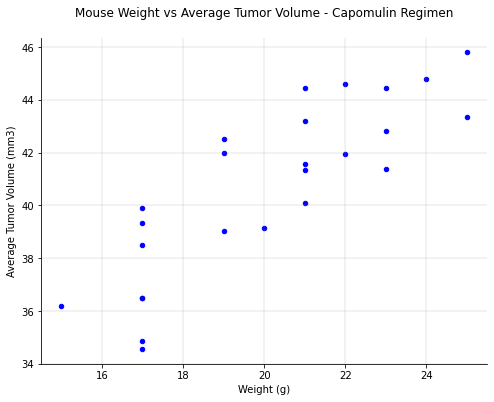

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Creating a Data Frame with Capomulin regimen only
capomulin_regimen = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin')]

# Calculating Average Tumor Volume by Grouping by the Mouse ID and Weight
capomulin_weight_vol = pd.DataFrame(capomulin_regimen.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()

# Renaming column Tumor Volume (mm3) to Average Tumor Volume (mm3)
capomulin_weight_vol = capomulin_weight_vol.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Setting column Mouse ID as index
capomulin_weight_vol.set_index('Mouse ID')

# Creating a line plot from the Data Frame
ax = capomulin_weight_vol.plot(kind="scatter",
                             x="Weight (g)",
                             y="Average Tumor Volume (mm3)",
                             title="Mouse Weight vs Average Tumor Volume - Capomulin Regimen\n",
                             figsize=(8,6),
                             color='blue')

# Removing the top and right spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Adding grid lines to the chart
ax.grid(color='grey', linewidth=0.25, alpha=0.8)

# Print our chart to the screen
plt.show()

## Correlation and Regression


The correlation between both factors is 0.84
The r-squared is: 0.7089



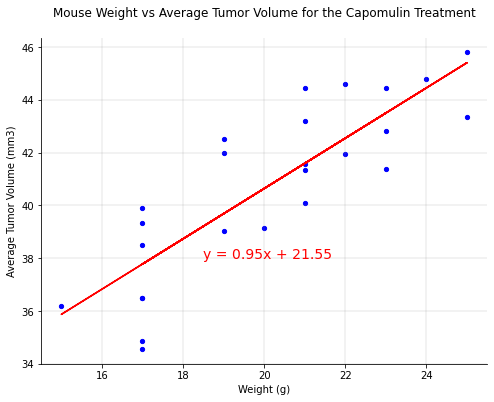

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Setting Weight and Average Volume into x and y value lists
x_values = capomulin_weight_vol['Weight (g)']
y_values = capomulin_weight_vol['Average Tumor Volume (mm3)']

# Calculating and Printing Pearson correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between both factors is {round(correlation[0],2)}")


# Print out the r-squared value along with the plot.

# Setting the figure size
fig = plt.figure(figsize=(8,6))

# Creating subplot (1x1 grid, 1st subplot)
ax = fig.add_subplot(1,1,1)

# Adding grid lines to the chart
ax.grid(alpha=0.8, color='grey', linewidth=0.25)

# Removing the top and right spines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Finding slope and y intercept of line, r value, p value and standard error using scipy.stats.linregress function
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Print the r square value
print(f"The r-squared is: {round(rvalue**2, 4)}\n")

# Line equation y=mx+b
regress_values = slope * x_values + intercept

# Line equation string y=mx+b to diplay
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of Weight and Average Tumor volume
plt.scatter(x_values, y_values, color='blue', s=18)

# Creating a line plot
plt.plot(x_values, regress_values, "r-")

# Adding line_eq string at specified position
plt.annotate(line_eq,(18.5,38),fontsize=14,color="red")

# Adding title and labels to the plot 
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Treatment\n")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print our chart to the screen
plt.show()